# Calculus for Machine Learning Day_2

## Backpropagation


In [1]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(0)
 
# Find a small float to avoid division by zero
epsilon = np.finfo(float).eps
 
# Sigmoid function and its differentiation
def sigmoid(z):
    return 1/(1+np.exp(-z.clip(-500, 500)))
def dsigmoid(z):
    s = sigmoid(z)
    return 2 * s * (1-s)
 
# ReLU function and its differentiation
def relu(z):
    return np.maximum(0, z)
def drelu(z):
    return (z > 0).astype(float)
 
# Loss function L(y, yhat) and its differentiation
def cross_entropy(y, yhat):
    """Binary cross entropy function
        L = - y log yhat - (1-y) log (1-yhat)
 
    Args:
        y, yhat (np.array): nx1 matrices which n are the number of data instances
    Returns:
        average cross entropy value of shape 1x1, averaging over the n instances
    """
    return ( -(y.T @ np.log(yhat.clip(epsilon)) +
               (1-y.T) @ np.log((1-yhat).clip(epsilon))
              ) / y.shape[1] )
 
def d_cross_entropy(y, yhat):
    """ dL/dyhat """
    return ( - np.divide(y, yhat.clip(epsilon))
             + np.divide(1-y, (1-yhat).clip(epsilon)) )
 
class mlp:
    '''Multilayer perceptron using numpy
    '''
    def __init__(self, layersizes, activations, derivatives, lossderiv):
        """remember config, then initialize array to hold NN parameters
        without init"""
        # hold NN config
        self.layersizes = tuple(layersizes)
        self.activations = tuple(activations)
        self.derivatives = tuple(derivatives)
        self.lossderiv = lossderiv
        # parameters, each is a 2D numpy array
        L = len(self.layersizes)
        self.z = [None] * L
        self.W = [None] * L
        self.b = [None] * L
        self.a = [None] * L
        self.dz = [None] * L
        self.dW = [None] * L
        self.db = [None] * L
        self.da = [None] * L
 
    def initialize(self, seed=42):
        """initialize the value of weight matrices and bias vectors with small
        random numbers."""
        np.random.seed(seed)
        sigma = 0.1
        for l, (n_in, n_out) in enumerate(zip(self.layersizes, self.layersizes[1:]), 1):
            self.W[l] = np.random.randn(n_in, n_out) * sigma
            self.b[l] = np.random.randn(1, n_out) * sigma
 
    def forward(self, x):
        """Feed forward using existing `W` and `b`, and overwrite the result
        variables `a` and `z`
 
        Args:
            x (numpy.ndarray): Input data to feed forward
        """
        self.a[0] = x
        for l, func in enumerate(self.activations, 1):
            # z = W a + b, with `a` as output from previous layer
            # `W` is of size rxs and `a` the size sxn with n the number of data
            # instances, `z` the size rxn, `b` is rx1 and broadcast to each
            # column of `z`
            self.z[l] = (self.a[l-1] @ self.W[l]) + self.b[l]
            # a = g(z), with `a` as output of this layer, of size rxn
            self.a[l] = func(self.z[l])
        return self.a[-1]
 
    def backward(self, y, yhat):
        """back propagation using NN output yhat and the reference output y,
        generates dW, dz, db, da
        """
        # first `da`, at the output
        self.da[-1] = self.lossderiv(y, yhat)
        for l, func in reversed(list(enumerate(self.derivatives, 1))):
            # compute the differentials at this layer
            self.dz[l] = self.da[l] * func(self.z[l])
            self.dW[l] = self.a[l-1].T @ self.dz[l]
            self.db[l] = np.mean(self.dz[l], axis=0, keepdims=True)
            self.da[l-1] = self.dz[l] @ self.W[l].T
 
    def update(self, eta):
        """Updates W and b
 
        Args:
            eta (float): Learning rate
        """
        for l in range(1, len(self.W)):
            self.W[l] -= eta * self.dW[l]
            self.b[l] -= eta * self.db[l]
 
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
y = y.reshape(-1,1) # our model expects a 2D array of (n_sample, n_dim)
 
# Build a model
model = mlp(layersizes=[2, 4, 3, 1],
            activations=[relu, relu, sigmoid],
            derivatives=[drelu, drelu, dsigmoid],
            lossderiv=d_cross_entropy)
model.initialize()
yhat = model.forward(X)
loss = cross_entropy(y, yhat)
score = accuracy_score(y, (yhat > 0.5))
print(f"Before training - loss value {loss} accuracy {score}")
 
# train for each epoch
n_epochs = 150
learning_rate = 0.005
for n in range(n_epochs):
    model.forward(X)
    yhat = model.a[-1]
    model.backward(y, yhat)
    model.update(learning_rate)
    loss = cross_entropy(y, yhat)
    score = accuracy_score(y, (yhat > 0.5))
    print(f"Iteration {n} - loss value {loss} accuracy {score}")

Before training - loss value [[693.62972747]] accuracy 0.5
Iteration 0 - loss value [[693.62972747]] accuracy 0.5
Iteration 1 - loss value [[693.62166655]] accuracy 0.5
Iteration 2 - loss value [[693.61534159]] accuracy 0.5
Iteration 3 - loss value [[693.60994018]] accuracy 0.5
Iteration 4 - loss value [[693.60515795]] accuracy 0.5
Iteration 5 - loss value [[693.60082044]] accuracy 0.5
Iteration 6 - loss value [[693.59683747]] accuracy 0.5
Iteration 7 - loss value [[693.59314676]] accuracy 0.5
Iteration 8 - loss value [[693.5896873]] accuracy 0.5
Iteration 9 - loss value [[693.58643119]] accuracy 0.5
Iteration 10 - loss value [[693.58333162]] accuracy 0.5
Iteration 11 - loss value [[693.58036603]] accuracy 0.5
Iteration 12 - loss value [[693.57752348]] accuracy 0.5
Iteration 13 - loss value [[693.57478667]] accuracy 0.5
Iteration 14 - loss value [[693.57214202]] accuracy 0.5
Iteration 15 - loss value [[693.56957462]] accuracy 0.5
Iteration 16 - loss value [[693.56707586]] accuracy 0.5


## Optimization

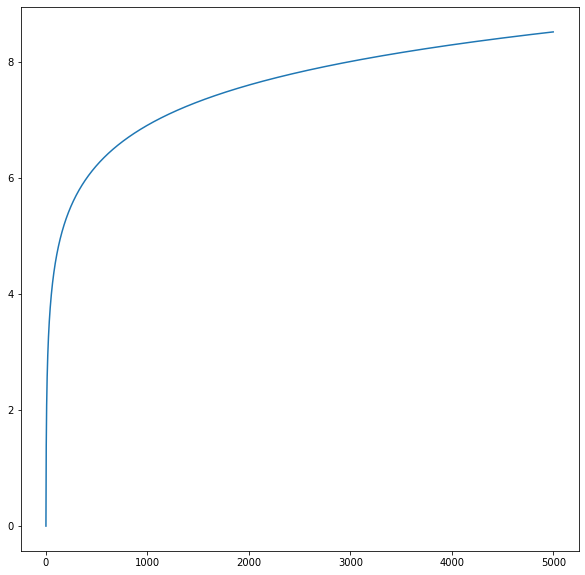

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x)

x = np.arange(0, 5000, 1)

y = f(x)

plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.tight_layout
np.seterr(divide = 'ignore') 
plt.show()


## Support Vector Machine

In [17]:
import numpy as np
from scipy.optimize import minimize

def objective(w):
    return w[0]**2 + w[1]**2

def constraint_1(w):
    return -1*w[2]-1

def constraint_2(w):
    return -1*(-3*w[0] - w[1] + w[2] - 1)

def constraint_3(w):
    return -1*(-w[0] - w[1] + w[2] - 1)

def constraint_4(w):
    return (w[0] + 2*w[1] + w[2] - 1)

def constraint_5(w):
    return (2*w[0] + w[1] + w[2] - 1)

def constraint_6(w):
    return (3*w[0] + 3*w[1] + w[2] - 1)

w0 = np.array([1,1,1])

bounds = ((-10,10), (-10,10), (-10,10))
constraints = [
    {"type":"ineq", "fun":constraint_1},
    {"type":"ineq", "fun":constraint_2},
    {"type":"ineq", "fun":constraint_3},
    {"type":"ineq", "fun":constraint_4},
    {"type":"ineq", "fun":constraint_5},
    {"type":"ineq", "fun":constraint_6},
]
solution = minimize(objective, w0, method="SLSQP", bounds=bounds, constraints=constraints)
w = solution.x
print("Objective:", objective(w))
print("Solution:", w)

Objective: 0.8888888888889045
Solution: [ 0.66666667  0.66666667 -1.        ]
